In [1]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as im
from moviepy.editor import VideoFileClip
from project import *

%matplotlib inline

### Camera Calibration

In [2]:
camera = Camera()

camera.calibrate("./camera_cal/*.jpg")

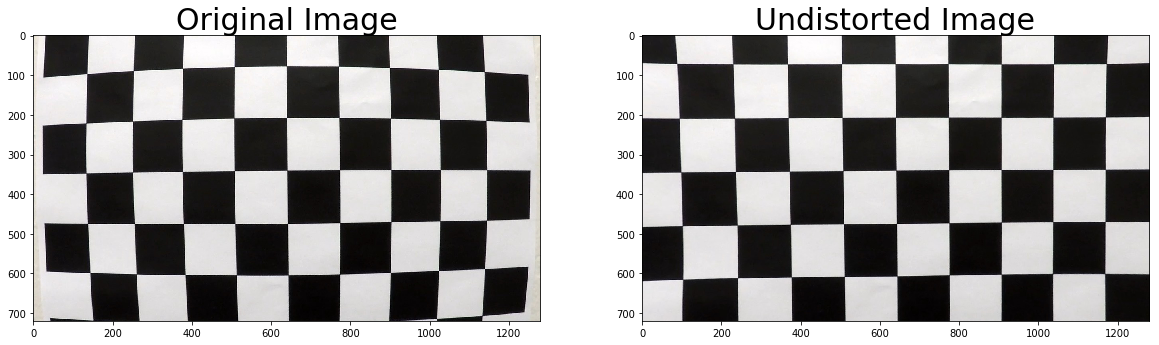

In [3]:
# Read test image
image = im.imread("camera_cal/calibration1.jpg")
dst   = camera.undistort(image)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [4]:
detection = LaneDetection(camera)


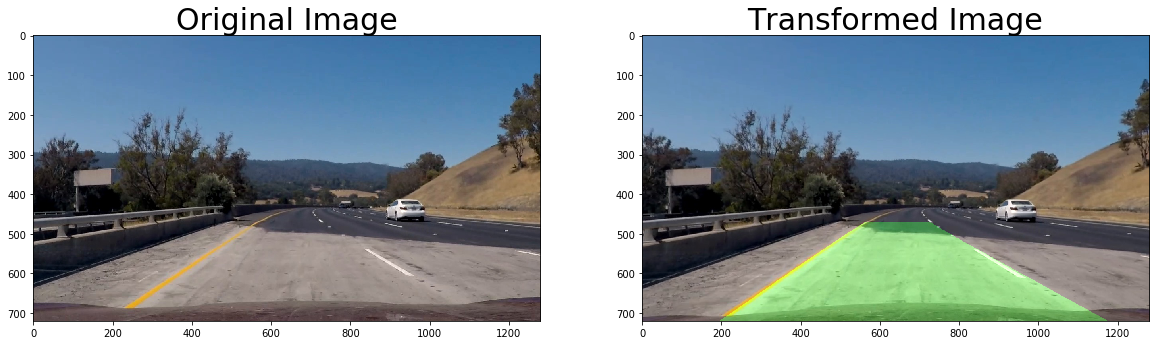

In [5]:
image        = plt.imread("./frame_608.jpg")
marked_image = detection.mark_lane(image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(marked_image)
ax2.set_title('Transformed Image', fontsize=30)

In [7]:
id = 1
def process_frame(image):
    #global id
    #id = id+1
    output = detection.mark_lane(image)
    #im.imsave("output/output_{}.jpg".format(id), output)
    return output

count = 1
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(lambda image: process_frame(image))
processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [02:36<00:00,  7.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

